## <center>Classification model on the Dry Bean dataset</center>

**Name: Elise Rattigan**<br>
**Last modified:** August 2021<br>

This project is adapted from one of the assignments in my Machine Learning unit at university, for which I received a mark of 100%.

The purpose of this project was to use classification models to explore the **Dry Bean dataset** from *UCI Machine Learning*.  The aim was to train a model which would accurately predict the class of bean, given 16 different features describing the bean's form, structure and dimensions.

In this notebook, I will be training and comparing two different multi-class classification models: a Support Vector Classifier (SVC) and a Stochastic Gradient Descent Classifier (SGD Classifier).

For each model, I will be using `GridSearch` cross-validation to find the best combination of hyperparameters, and then fitting the model to the training data with those parameters.  I will evaluate the two models on the test set by producing their accuracy scores and confusion matrices. Finally, I will compare the performance of the two models by visualising their confusion matrices side-by-side.

In [1]:
# Imports
import os
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

## 1. Data Loading and Visualisation

The first step is to load in the data. As the data is saved in a `.xlsx` file, I will use the `openpyxl` package to import it and convert the resulting object into a pandas `DataFrame`.

In [2]:
# Specify directory where data is located
data_dir = os.path.join('data', 'Dry_Bean_Dataset.xlsx')

# Load in the data using openpyxl
from openpyxl import load_workbook
wb = load_workbook(data_dir)

# Access the 'Dry_Beans_Dataset' sheet
ws = wb['Dry_Beans_Dataset']
data = ws.values

# Get the first line in the file as a header line
columns = next(data)[0:]

# Create a DataFrame
df = pd.DataFrame(data, columns=columns)

In [3]:
# Inspect the first five lines of the DataFrame
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# Take a look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

The above output shows there are 13611 observations in the dataset, and it has 17 attributes, as expected from the description of the dataset.  There are no missing values. The target attribute is `Class`, and the rest are features to be used as predictors in the models.

All of the columns apart from the target attribute are numerical, and we can look at these in more detail below.

In [5]:
# Show metrics about the numerical columns
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


The above output displays metrics including mean, quartiles and standard deviation for each of the numerical attributes.

We can further visualise the numerical features by plotting each one as a histogram.

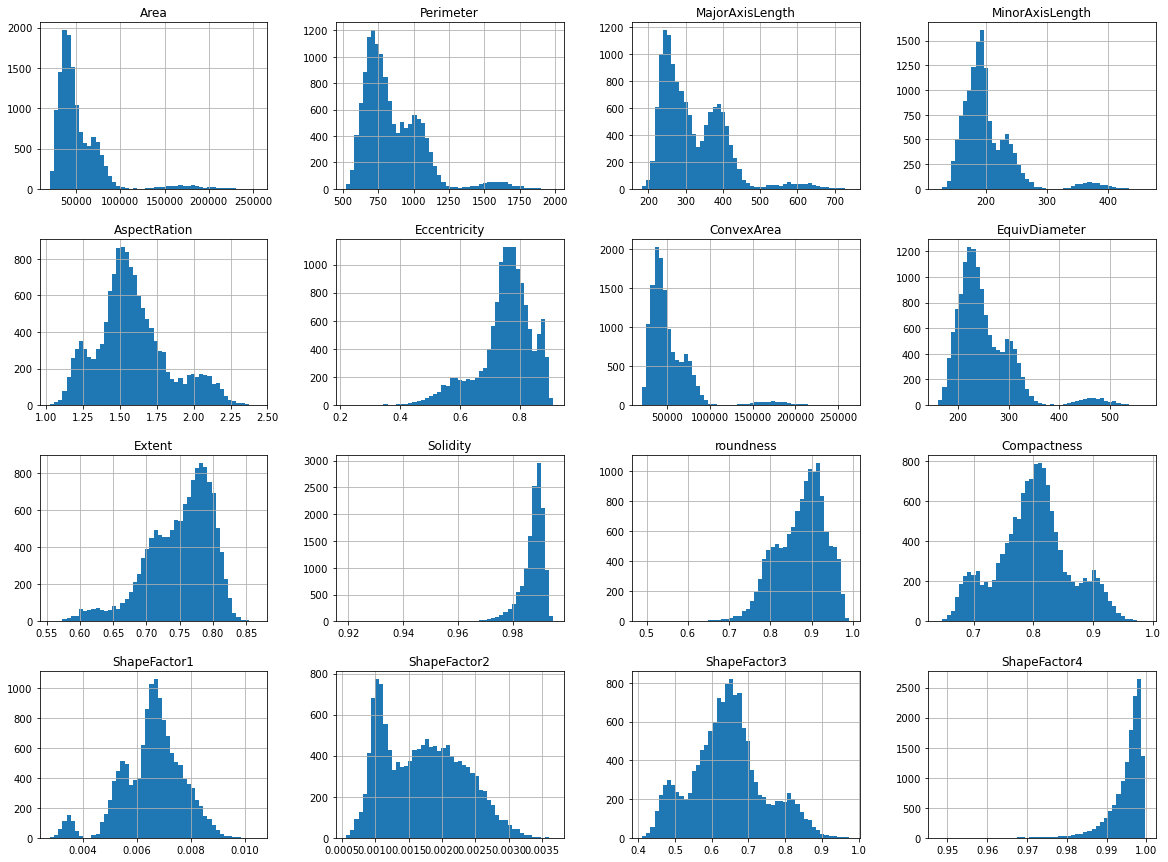

In [6]:
df.hist(bins=50, figsize=(20,15))
plt.show()

We can see from the histograms that many of the features are skewed, which may make it harder to detect patterns.  It is also important to note that these attributes have quite different scales, so feature scaling will need to be performed.

I have chosen the following 6 features to illustrate with a scatter matrix:

* AspectRatio
* Eccentricity
* Extent
* Compactness
* ShapeFactor1
* ShapeFactor2

I have selected these 6 features because they appear to have a wide spread of values, so it would be interesting to investigate whether there is any correlation between them.  Also, not knowing much about dry beans, I have selected these features to try and give a broad overview of the data and look for patterns between features that may not be well understood. I have left out features such as area and length, which are mathematically related, so I would expect them to be correlated.

The scatter matrix is illustrated below.

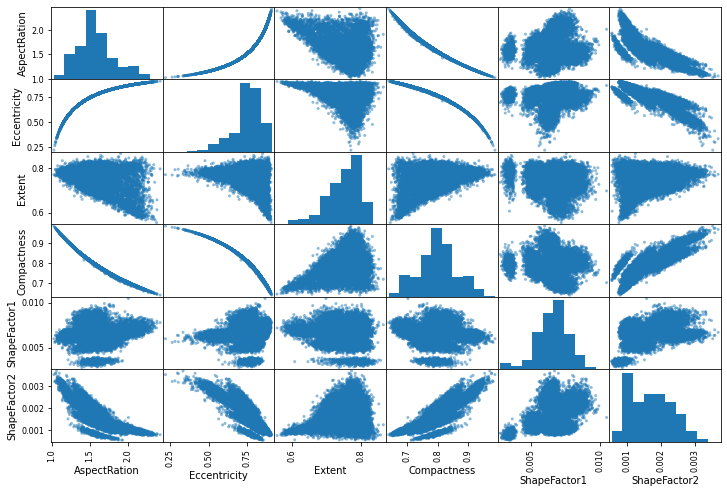

In [7]:
from pandas.plotting import scatter_matrix

# Array of features
features = ['AspectRation', 'Eccentricity', 'Extent', 'Compactness', 'ShapeFactor1', 'ShapeFactor2']

# Plot scatter matrix
scatter_matrix(df[features], figsize=(12, 8));

From the scatter matrix, we can see some of these features are highly correlated with each other. Some observations:

* AspectRatio is strongly positively correlated with Eccentricity, and strongly negatively correlated with Compactness. Accordingly, Eccentricity and Compactness have a strong negative correlation with one another.
* ShapeFactor1 doesn't appear to have much correlation with any of these features.
* ShapeFactor2 has a fairly strong correlation with AspectRatio, Eccentricity and Compactness, but little to no correlation with Extent and ShapeFactor1.
* Extent has some weak correlations with all features except ShapeFactor1.

### Class Balance

The number of instances in each class is displayed below:

In [8]:
# Display the number of instances in each class
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

The 'BOMBAY' class has the fewest instances (522). The class with the most instances (3546) is 'DERMASON'. There is some element of imbalances between the classes.

## 2. Data Preparation and Feature Scaling

### Split the data

The data can be randomly split the data into a training set and a test set using the `train_test_split` function from Scikit-Learn. I will be using an 80/20 split. 

In [9]:
# First separate the target variable from the predictors
X = df.drop('Class', axis=1)

y = df.Class.values

In [10]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
print('There are {} instances in the training set.'.format(len(y_train)))

There are 10888 instances in the training set.


In [12]:
print('There are {} instances in the test set.'.format(len(y_test)))

There are 2723 instances in the test set.


This is almost exactly an 80/20 split.

### Feature scaling

To standardise the data in the training set, I will use Scikit-Learn's `StandardScaler` class on the numerical features. This will transform these features to have a mean of 0 and unit standard deviation.

In [13]:
from sklearn.preprocessing import StandardScaler

# Create instance of StandardScaler class
scaler = StandardScaler()

# Transform the training data
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
# View the scaled training data
X_train_scaled

array([[-0.82004684, -1.02202571, -0.9916898 , ...,  0.87409641,
         0.26508427,  0.34316281],
       [-0.50936012, -0.46410379, -0.56941112, ...,  0.32551494,
         0.16383972,  0.04702778],
       [-0.7548078 , -0.95078365, -1.04911073, ...,  1.38029879,
         1.01678554,  0.34322861],
       ...,
       [ 1.27973353,  1.42053356,  1.60855361, ..., -1.3015929 ,
        -0.95796902, -0.24362728],
       [-0.49781492, -0.66962309, -0.85527186, ...,  1.41306453,
         1.61953833,  0.85939177],
       [ 0.37072934,  0.67304599,  0.9513581 , ..., -1.22706772,
        -1.41055324, -1.00995094]])

The same transformation (as computed from the training set) can be applied to the test set with the code below:

In [15]:
# Transform the test data with same transformation
X_test_scaled = scaler.transform(X_test)

## 3. Support Vector Classifier

Now that the data is prepared, I can train the first model, the Support Vector Classifier, using the `SVC` class from Scikit-Learn.  The Support Vector Classfier performs one-versus-one binary classification.  I will use the Gaussian RBF kernel, which gives the same result as if many similarity features had been added to the model.

The SVC class has two hyperparameters, $\gamma$ and **C**.  I will first use `GridSearchCV` to find the best combination of hyperparameter values for the classifier, before fitting the model.

**Note**: I initially used a larger number of parameters for the search, but the code took a very long time to execute. For the purposes of displaying this notebook as an example, I have chosen only three values to search for each parameter.

In [16]:
# Create grid of parameters to search
params_grid_svc = [{'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1], 'C': [1, 100, 1000]}]

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create SVC object
svc_model = SVC()

# Run GridSearchCV with grid of parameters, 5 folds
grid_search_svc = GridSearchCV(svc_model, params_grid_svc, cv=5)
grid_search_svc.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 100, 1000], 'gamma': [0.001, 0.01, 0.1],
                          'kernel': ['rbf']}])

In [18]:
# Get the best combination of parameters
grid_search_svc.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

From the `GridSearchCV` results, it seems that the best hyperparameter values are **C** = 1000 and $\gamma$ = 0.01.  **C** is the penalty parameter which controls the trade-off between correct classifications and a smooth decision boundary. This large value of C means the model will have fewer misclassifications, but may overfit the training data and not generalise well. This will be evaluated when the model is run on the test set.

The $\gamma$ parameter determines the range of influence of each instance. This small value of $\gamma$ means the instances have a larger range of influence, leading to a smoother decision boundary.

I will use the best parameters from the `GridSearchCV` results to fit the final SVC model.  Then, I will use the model to make predictions on the test set, and check the accuracy of the model using cross-validation.

In [19]:
# Get the final model
final_svc = grid_search_svc.best_estimator_

# Use the final model to make predictions on the scaled test set
y_pred_svc = final_svc.predict(X_test_scaled)

In [20]:
# Cross-validation with three folds, measuring accuracy
from sklearn.model_selection import cross_val_score
cross_val_score(final_svc, X_test_scaled, y_test, cv=3, scoring="accuracy")

array([0.92511013, 0.91740088, 0.93384785])

This model is over 91% accurate on all three folds, which is an excellent score.  This means it gets over 91% of predictions correct.

We can look at a confusion matrix for the test set, which shows the correct classifications and misclassifications for each class.

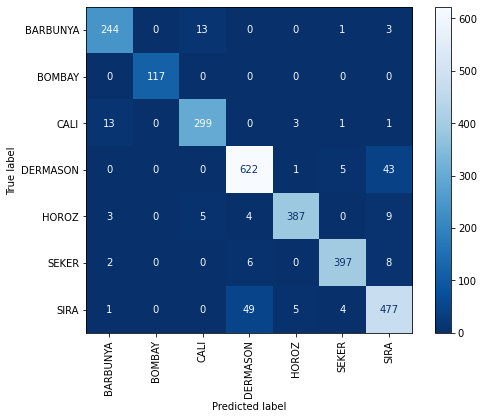

In [21]:
from sklearn.metrics import plot_confusion_matrix

# Define figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Plot confusion matrix
plot_confusion_matrix(final_svc, X_test_scaled, y_test,
                      xticks_rotation='vertical', cmap="Blues_r",
                      ax=ax);

An explanation of this confusion matrix will be given in section 5: Model Comparison, at the end of this notebook.

## 4. Stochastic Gradient Descent Classifier

The next model I will train is a Stochastic Gradient Descent Classifier, using the `SGDClassifier` class from Scikit-Learn.  It is an optimisation algorithm which iterates through random training instances to find the parameters which minimise the loss function.

Again, I will use `GridSearchCV` to find the best combination of hyperparameter values. I will be using the 'hinge' loss function (for a linear SVM), and using GridSearch to find the optimal values of $\alpha$ and the penalty term.

In [22]:
# Create grid of parameters to search
params_grid_sgd = [{'loss': ['hinge'],
                'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1],
                'penalty': ['l2', 'l1', 'elasticnet', 'none']}]

In [23]:
from sklearn.linear_model import SGDClassifier

# Create SGD model with max 1000 iterations
sgd_model = SGDClassifier(max_iter=1000)

# Run GridSearchCV with grid of parameters, 5 folds
grid_search_sgd = GridSearchCV(sgd_model, params_grid_sgd, cv=5)
grid_search_sgd.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid=[{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                          'loss': ['hinge'],
                          'penalty': ['l2', 'l1', 'elasticnet', 'none']}])

In [24]:
# Get the best combination of parameters
grid_search_sgd.best_params_

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'none'}

From the `GridSearchCV` results, it seems that the best hyperparameter value for penalty is 'None', which means there is no regularisation term, i.e. none of the features have been constrained.

The $\alpha$ term serves two purposes (according to the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)). Firstly, it is a constant that multiples the regularisation term, but it does not mean much here as I am using `penalty='None'`.  Secondly, for the default `learning_rate='optimal'`, it acts as a constant used to compute the learning rate.

I will use these parameters to fit the final SGDClassifier model, make predictions on the test set, and evaluate the accuracy of the model with cross-validation.

In [25]:
# Get the final model
final_sgd = grid_search_sgd.best_estimator_

# Use the final model to make predictions on the scaled test set
y_pred_sgd = final_sgd.predict(X_test_scaled)

In [26]:
# Cross-validation with three folds, measuring accuracy
cross_val_score(final_sgd, X_test_scaled, y_test, cv=3, scoring="accuracy")

array([0.92731278, 0.91629956, 0.9261301 ])

Similar to the SVC classifier, this model is over 91% accurate on all three folds.

Below is the confusion matrix of this model's performance on the test set.

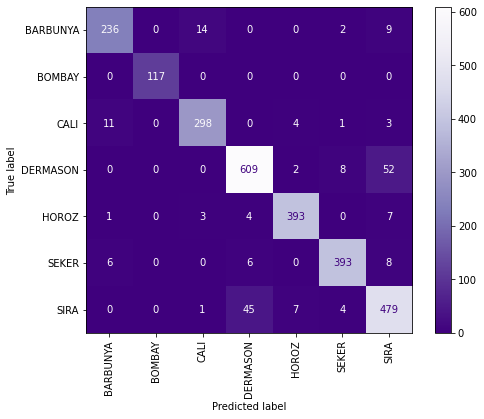

In [27]:
# Define figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Plot confusion matrix
plot_confusion_matrix(final_sgd, X_test_scaled, y_test,
                      xticks_rotation='vertical', cmap="Purples_r",
                      ax=ax);

Again, see the next section for an explanation of this confusion matrix, and a comparison of the two models.

## 5. Model comparison

The confusion matrices for the SVC and SGD Classifiers can be seen side-by-side below.

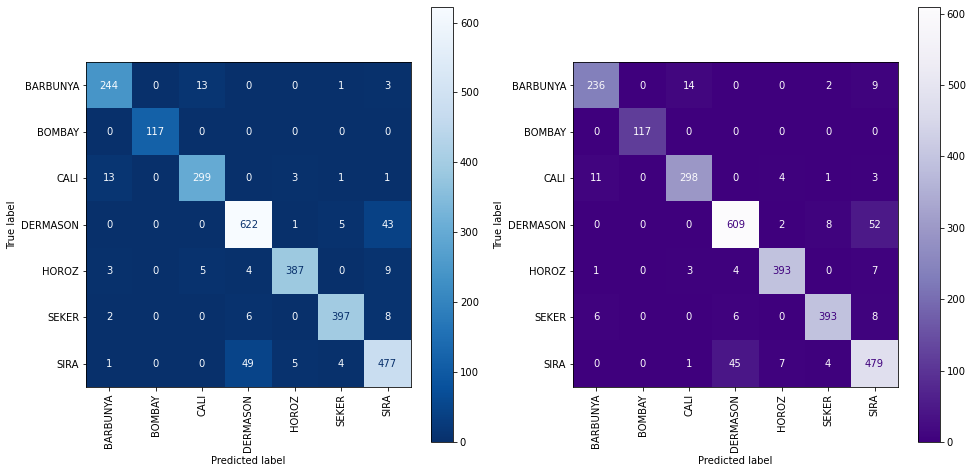

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

plot_confusion_matrix(final_svc, X_test_scaled, y_test,
                      xticks_rotation='vertical', cmap="Blues_r",
                      ax=ax1);

plot_confusion_matrix(final_sgd, X_test_scaled, y_test,
                      xticks_rotation='vertical', cmap="Purples_r",
                      ax=ax2);

In both matrices, the diagonal elements represent the total correct values predicted per class.  There is a class imbalance, so looking at these numbers doesn't necessarily say much about the model's performance.  We must look at the classifications made on individual classes to get a better idea of the model's accuracy.

#### Support Vector Classifier
Firstly, looking at the confusion matrix for the SVC, we can see that the model correctly predicted all instances of the class BOMBAY.  It has also done fairly well at correctly predicting HOROZ, SEKER and BARBUNYA classes.

This model appears to have the most difficulty correctly predicting the DERMASON and SIRA classes, and tends to get the two mixed up. The model incorrectly classified DERMASON as SIRA 43 times, and SIRA as DERMASON 49 times.

#### SGD Classifier
The SGD classifier also correctly predicted all instances of the class BOMBAY, and performed similarly on the HOROZ and BARBUNYA classes.  It performed a little worse than the SVC on the SEKER class, incorrectly classifying 32 SEKER beans as other classes (16 incorrect for SVC model).

This model also tends to mix up DERMASON and SIRA, but incorrectly classified DERMASON as SIRA more frequently than the SVC model (59 times compared with 43 times).

## Conclusion

In conclusion, both the SVC and SGD classifiers performed well on the Dry Bean dataset, achieving over 91% prediction accuracy. For the purposes of the original assignment, only accuracy and confusion matrices were used in the evaluation, but the models could be further evaluated by looking at other performances measures such as precision and recall, and Area Under the Curve (AUC).

Although both models performed very well, it might be possible to improve them by exploring a greater range of hyperparameters, i.e. using `RandomizedSearchCV` to explore more combinations.  Additionally, further splitting the data to also include a validation set would help to tune the models and find optimal hyperparameter values.